Import Packages

In [1]:
import numpy as np
import scipy.optimize as opt
import sympy as sp
import matplotlib.pyplot as plt
from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D

### 5.1

The problem is: 
$$\max \limits_{W_2\in[0,W_1]}u(W_1-W_2)$$

### 5.2

The condition that characterizes the optimal amount of cake to leave for the next period $W_3$ in period 2 is:
$$\max \limits_{W_3\in[0,W_2]}u(W_2-W_3)$$
The condition that characterizes the optimal amount of cake to leave for the next period $W_2$ in period 1 is:
$$\max \limits_{W_2\in[0,W_1]}[u(W_1-W_2)+\max \limits_{W_3\in[0,W_2]}\beta u(W_2-W_3)]$$

### 5.3

The condition that characterizes the optimal amount of cake to leave for the next period ${W_2, W_3, W_4}$ in period 1, 2, 3 are respectively:
$$\max \limits_{W_2\in[0,W_1]}\{u(W_1-W_2)+\max \limits_{W_3\in[0,W_2]}\beta [u(W_2-W_3)+\max \limits_{W_4\in[0,W_3]}\beta u(W_3-W_4)]\}$$
$$\max \limits_{W_3\in[0,W_2]}\beta [u(W_2-W_3)+\max \limits_{W_4\in[0,W_3]}\beta u(W_3-W_4)]$$
$$\max \limits_{W_4\in[0,W_3]}\beta u(W_3-W_4)$$
From the 3rd condition, we know that $W_4=0$, from the 1st and 2nd condition, we know that if we differentiate the left hand side of 1st condition with respect to W_2 and W_3, every derivatives should equal to 0 to maximise it, i.e.,
$$-u'(W_1-W_2)+\beta u'(W_2-W_3)=0$$
$$-\beta u'(W_2-W_3)+\beta^2 u'(W_3-W_4)=0$$
We also know that $u(x)=ln(x)$,$W_1=1$ and $W_4=0$, so we can solve the equations to get $W_2=0.631$, $W_3=0.299$, we can then find out $c_1=W_1-W_2=0.369$, $c_2=W_2-W_3=0.332$, $c_3=W_3-W_4=0.299$
The evolve of $\{c_t\}_{t=1}^{3}$ and $\{W_t\}_{t=1}^{4}$ is as follows:

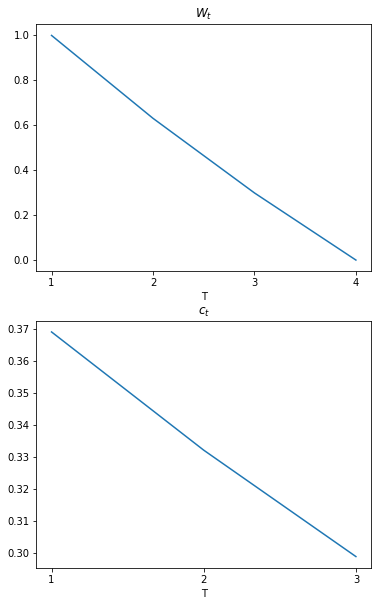

In [2]:
W = [1, 1-1/(1+0.9+0.81), 1-1.9/(1+0.9+0.81), 0]
c = [1/(1+0.9+0.81),0.9/(1+0.9+0.81),0.81/(1+0.9+0.81)]
T = [1,2,3,4]
fig, ax=plt.subplots(2,1,figsize=(6,10))
ax[0].plot(T, W)
ax[1].plot(T[:-1], c)
ax[0].set_title(r"$W_t$")
ax[0].set_xlabel('T')
ax[0].set_xticks([1,2,3,4])
ax[1].set_title(r"$c_t$")
ax[1].set_xlabel('T')
ax[1].set_xticks([1,2,3])

### 5.4

The condition that characterizes the optimal choice in period T-1 is:
$$-u'(W_{T-1}-\psi_{T-1}(W_{T-1}))+\beta u'(\psi_{T-1}(W_{T-1})) = 0$$
Then we can express $V_{T-1}$ as follows:
$$V_{T-1}(W_{T-1})=u(W_{T-1}-\psi_{T-1}(W_{T-1}))+\beta u(\psi_{T-1}(W_{T-1}))$$

### 5.5

According to the former question, we know $V_T(\bar{W})=u(\bar{W})$, suppose $V_{T-1}(\bar{W})=V_T(\bar{W})$, that is:
$$u(\bar{W})=u(\bar{W}-\psi_{T-1}(\bar{W}))+\beta u(\psi_{T-1}(\bar{W}))$$
$$-u'(\bar{W}-\psi_{T-1}(\bar{W}))+\beta u'(\psi_{T-1}(\bar{W})) = 0$$
Since $u(x)=ln(x)$ and we can solve former equations:
$$\psi_{T-1}(\bar{W})=\frac{\beta}{1+\beta}\bar{W}>0$$
$$\psi_{T}(\bar{W}) = 0$$
$$V_{T-1}(\bar{W})=ln(\frac{\bar{W}}{1+\beta})+\beta ln(\frac{\beta\bar{W}}{1+\beta})$$
$$V_T(\bar{W})=ln(\bar{W})$$

### 5.6

The finite horizon Bellman equation for the value function at time T-2 is:
$$V_{T-2}(W_{T-2})=\max \limits_{W_{T-1}} ln(W_{T-2}-W_{T-1}))+\beta ln(\frac{W_{T-1}}{1+\beta})+\beta^2 ln(\frac{\beta W_{T-1}}{1+\beta})$$
The condition that characterizes the optimal choice in period T-2 is:
$$-\frac{1}{(W_{T-2}-\psi_{T-2}(W_{T-2}))}+(\beta+\beta^2)\frac{1}{\psi_{T-2}(W_{T-2})} = 0$$
The analytical solution for $\psi_{T-2}(W_{T-2})$ and $V_{T-2}(W_{T-2})$ is:
$$\psi_{T-2}(W_{T-2})=\frac{\beta+\beta^{2}}{1+\beta+\beta^{2}}W_{T-2}$$
$$V_{T-2}(W_{T-2}) = ln(\frac{W_{T-2}}{1+\beta+\beta^{2}})+\beta ln(\frac{\beta W_{T-2}}{1+\beta+\beta^{2}})+\beta^2 ln(\frac{\beta^2 W_{T-2}}{1+\beta+\beta^{2}})$$

### 5.7

By induction, the analytical solution for $\psi_{T-s}(W_{T-s})$ and $V_{T-s}(W_{T-s})$ is:
$$\psi_{T-s}(W_{T-s})=\frac{\sum\limits_{i=1}^{s}\beta^{i}}{1+\sum\limits_{i=1}^{s}\beta^{i}}W_{T-s}$$
$$V_{T-s}(W_{T-s}) = \left[\sum\limits_{i=0}^{s-1} \beta^{i}ln\left(\frac{\beta^{i}W_{T-s}}{1+\sum\limits_{i=1}^{s}\beta^{i}}\right)\right]+\beta^{s}ln\left(\frac{\beta^{s} W_{T-s}}{1+\sum\limits_{i=1}^{s}\beta^{i}}\right)$$
Take limits of s tend to infinite, we have:
$$\psi(W_{T-s})=\beta W_{T-s}$$
$$V(W_{T-s}) = \left(\frac{1}{1-\beta}\right)ln((1-\beta)W_{T-s})+\frac{\beta}{(1-\beta)^2}ln(\beta)$$

### 5.8

$$V(W)=\max \limits_{w\in[0,W]} u(W-w))+\beta V(w)$$

### 5.9

The code is as follows:

In [3]:
W = np.linspace(0.01, 1, 100)

### 5.10

In [4]:
c_mat = W.reshape(-1,1)-W
c_mat[c_mat<=0] = 1e-7
u_mat = np.log(c_mat)
N = 100
beta = 0.9

In [5]:
psi_T = np.empty(100)
Value_T = np.empty(100)
for i in range(100):
    w = W[i]
    value_func = lambda x: -np.log(w-x)
    psi_T[i] = max(float(opt.fmin(value_func, 0, disp = 0)),0)
    Value_T[i] = np.log(w-psi_T[i])
print("The policy function W' is\n", psi_T)
print("The value function V_T is\n", Value_T)

The policy function W' is
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
The value function V_T is
 [-4.60517019 -3.91202301 -3.5065579  -3.21887582 -2.99573227 -2.81341072
 -2.65926004 -2.52572864 -2.40794561 -2.30258509 -2.20727491 -2.12026354
 -2.04022083 -1.96611286 -1.89711998 -1.83258146 -1.77195684 -1.71479843
 -1.66073121 -1.60943791 -1.56064775 -1.51412773 -1.46967597 -1.42711636
 -1.38629436 -1.34707365 -1.30933332 -1.27296568 -1.23787436 -1.2039728
 -1.17118298 -1.13943428 -1.10866262 -1.07880966 -1.04982212 -1.02165125
 -0.99425227 -0.96758403 -0.94160854 -0.91629073 -0.89159812 -0.86750057
 -0.84397007 -0.82098055 -0.7985077  -0.77652879 -0.75502258 -0.73396918
 -0.71334989 -0.69314718 -0.67334455 -0.65392647 -0.63487

### 5.11

In [6]:
Value_T_plus_1 = np.zeros(100)
delta_T = np.sum((Value_T-Value_T_plus_1)**2)
print("The distance metric is", delta_T)

The distance metric is 178.92611065972804


### 5.12

In [7]:
Value_T_minus_1 = np.array(Value_T)
psi_T_minus_1 = np.array(psi_T)
VT1_matrix = np.tile(Value_T.reshape(1,100),(100,1))
VT1_matrix[c_mat<0] = -9e+4
for i in range(N):
    Value_T_minus_1[i] = -9e+4
    for j in range(100):
        if u_mat[i,j]+beta*VT1_matrix[i,j] > Value_T_minus_1[i]:
            psi_T_minus_1[i] = W[j]
            Value_T_minus_1[i] = u_mat[i,j]+beta*VT1_matrix[i,j]  
    for i in range(100):
        if psi_T_minus_1[i] >= W[i]:
            psi_T_minus_1[i] = W[i]-0.01
delta_T_minus_1 = np.sum((Value_T-Value_T_minus_1)**2)
print("The policy function is\n", psi_T_minus_1)
print("The value function is\n", Value_T_minus_1)
print("The distance metric is", delta_T_minus_1)

The policy function is
 [0.   0.01 0.01 0.02 0.02 0.03 0.03 0.04 0.04 0.05 0.05 0.06 0.06 0.07
 0.07 0.08 0.08 0.09 0.09 0.09 0.1  0.1  0.11 0.11 0.12 0.12 0.13 0.13
 0.14 0.14 0.15 0.15 0.16 0.16 0.17 0.17 0.18 0.18 0.18 0.19 0.19 0.2
 0.2  0.21 0.21 0.22 0.22 0.23 0.23 0.24 0.24 0.25 0.25 0.26 0.26 0.27
 0.27 0.27 0.28 0.28 0.29 0.29 0.3  0.3  0.31 0.31 0.32 0.32 0.33 0.33
 0.34 0.34 0.35 0.35 0.36 0.36 0.36 0.37 0.37 0.38 0.38 0.39 0.39 0.4
 0.4  0.41 0.41 0.42 0.42 0.43 0.43 0.44 0.44 0.45 0.45 0.45 0.46 0.46
 0.47 0.47]
The value function is
 [-16.11809565  -8.74982335  -8.05667617  -7.43284371  -7.0273786
  -6.66246     -6.37477793  -6.11586407  -5.89272052  -5.69189132
  -5.50956976  -5.34548036  -5.19132968  -5.05259407  -4.91906268
  -4.79888442  -4.68110139  -4.57509666  -4.46973614  -4.37442596
  -4.2796015   -4.19259012  -4.10681096  -4.02676825  -3.94845801
  -3.87435004  -3.8023116   -3.73331873  -3.66662156  -3.60208303
  -3.53998945  -3.47936483  -3.42128016  -3.3641217

### 5.13

In [8]:
Value_T_minus_2=np.array(Value_T_minus_1)
psi_T_minus_2 = np.array(psi_T_minus_1)
VT2_matrix = np.tile(Value_T_minus_1.reshape(1,100),(100,1))
VT2_matrix[c_mat<0] = -9e+4
for i in range(N):
    Value_T_minus_2[i] = -9e+4
    for j in range(100):
        if u_mat[i,j]+beta*VT2_matrix[i,j] > Value_T_minus_2[i]:
            psi_T_minus_2[i] = W[j]
            Value_T_minus_2[i] = u_mat[i,j]+beta*VT2_matrix[i,j]  
    for i in range(100):
        if psi_T_minus_2[i] >= W[i]:
            psi_T_minus_2[i] = W[i]-0.01
delta_T_minus_2 = np.sum((Value_T_minus_1-Value_T_minus_2)**2)
print("The policy function is\n", psi_T_minus_2)
print("The value function is\n", Value_T_minus_2)
print("The distance metric is", delta_T_minus_2)

The policy function is
 [0.   0.01 0.02 0.02 0.03 0.04 0.04 0.05 0.06 0.06 0.07 0.08 0.08 0.09
 0.09 0.1  0.11 0.11 0.12 0.13 0.13 0.14 0.15 0.15 0.16 0.17 0.17 0.18
 0.18 0.19 0.19 0.2  0.21 0.21 0.22 0.23 0.23 0.24 0.25 0.25 0.26 0.27
 0.27 0.28 0.28 0.29 0.3  0.3  0.31 0.32 0.32 0.33 0.34 0.34 0.35 0.35
 0.36 0.36 0.37 0.38 0.38 0.39 0.4  0.4  0.41 0.42 0.42 0.43 0.44 0.44
 0.45 0.45 0.46 0.47 0.47 0.48 0.49 0.49 0.5  0.51 0.51 0.52 0.52 0.53
 0.54 0.54 0.55 0.55 0.56 0.57 0.57 0.58 0.59 0.59 0.6  0.61 0.61 0.62
 0.63 0.63]
The value function is
 [-17.30105439 -17.30105439 -12.4800112  -11.78686402 -11.16303156
 -10.60158234 -10.19611724  -9.83119864  -9.5027719   -9.21508983
  -8.95617596  -8.72315349  -8.50000993  -8.29918074  -8.11685918
  -7.9361129   -7.7720235   -7.61787282  -7.47019236  -7.33145675
  -7.19792536  -7.07306331  -6.95288505  -6.83510202  -6.72694159
  -6.62093686  -6.51557634  -6.42017208  -6.3248619   -6.23003744
  -6.14302606  -6.0572469   -5.97190488  -5.8918

### 5.14

In [9]:
def optimize(init=W, u = lambda x: np.log(x), 
             beta = 0.9, error = 1e-9, maxiter = 1000):
    W = init
    V = np.log(W)
    N = 100
    c_mat = W.reshape(-1,1)-W
    c_mat[c_mat<=0] = 1e-7
    u_mat = u(c_mat)
    Error = 1
    count = 0
    while Error>error and count <= maxiter:
        count += 1
        new_W = np.array(W)
        new_V = np.array(V)
        V_matrix = np.tile(V.reshape(1,100),(100,1))
        V_matrix[c_mat<=0] = -9e+4
        for i in range(N):
            new_V[i] = -9e+4
            for j in range(N):
                if u_mat[i,j]+beta*V_matrix[i,j] > new_V[i]:
                    new_W[i] = W[j]
                    new_V[i] = u_mat[i,j]+beta*V_matrix[i,j]
            for i in range(N):
                if new_W[i] > W[i]:
                    new_W[i] = W[i]-0.01
        Error = ((V-new_V)**2).sum()
        V = new_V
    return new_V,new_W
V, new_W = optimize()
print("The value function is\n", V)
print("The policy function is\n", new_W)

The value function is
 [-42.67084199 -42.67084199 -42.31577781 -41.91031271 -41.62263063
 -41.39948708 -41.21716553 -40.93815432 -40.67924046 -40.45609691
 -40.25526771 -40.06321183 -39.83018935 -39.6070458  -39.40621661
 -39.22389505 -39.04314877 -38.84289983 -38.64207063 -38.45974907
 -38.2790028  -38.1149134  -37.95224175 -37.77201774 -37.59127146
 -37.42718206 -37.26451041 -37.11035973 -36.96267927 -36.80822395
 -36.6455523  -36.49140162 -36.34372116 -36.19731667 -36.05858106
 -35.92504967 -35.78665896 -35.64025447 -35.50151886 -35.36798747
 -35.23507505 -35.10331102 -34.97844897 -34.85827071 -34.73371918
 -34.60195515 -34.4770931  -34.35691484 -34.23729367 -34.11870604
 -34.000923   -33.88854716 -33.78038673 -33.66748577 -33.54970274
 -33.43732689 -33.32916646 -33.22150741 -33.11477854 -33.00877381
 -32.90341329 -32.80227503 -32.70493065 -32.60267565 -32.49731514
 -32.39617688 -32.29883249 -32.20193934 -32.10588336 -32.0104791
 -31.91516892 -31.82034446 -31.72932002 -31.64171007 -

### 5.15

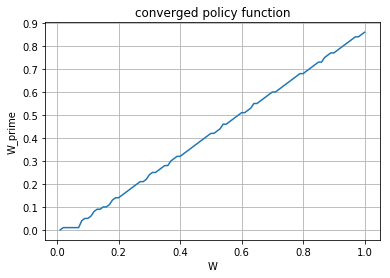

In [10]:
fig,ax = plt.subplots()
ax.plot(W,new_W)
ax.set_xlabel("W")
ax.set_ylabel("W_prime")
ax.set_yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
ax.set_title("converged policy function")
ax.grid()

### 5.16

In [11]:
sigma = 0.5
varepsilon = np.array([i*sigma for i in range(1,8)])
Gamma_func = lambda x: norm(loc = 4*sigma, scale = sigma).pdf(x)
Gamma = Gamma_func(varepsilon)

### 5.17

In [12]:
new_psi_T = np.zeros((100,7))
new_Value_T = np.empty((100,7))
for j in range(7):
    e = varepsilon[j]
    for i in range(100):
        w = W[i]
        new_value_func = lambda x: -e*np.log(w-x)
        new_psi_T[i,j] = max(float(opt.fmin(new_value_func, 0, disp = 0)),0)
        new_Value_T[i,j] = e*np.log(w-psi_T[i])
print("The policy function W' is\n", new_psi_T)
print("The value function V_T is\n", new_Value_T)

The policy function W' is
 [[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0.

### 5.18

In [13]:
new_Value_T_plus_1 = np.zeros((100,7))
new_delta_T = np.sum((new_Value_T-new_Value_T_plus_1)**2)
print("The distance metric is", new_delta_T)

The distance metric is 6262.4138730904815


### 5.19

In [14]:
new_Value_T_minus_1 = np.array(new_Value_T)
new_psi_T_minus_1 = np.array(new_psi_T)
for j in range(7):
    e = varepsilon[j]
    for i in range(100):
        w = W[i]
        new_Value_T_minus_1[i,j] = -9e+4
        for k in range(i):
            v_value = e*u_mat[i,k] + beta*\
                      sum(Gamma[p]*new_Value_T[k,p] for p in range(7))
            if v_value > new_Value_T_minus_1[i,j]:
                new_psi_T_minus_1[i,j] = W[k]
                new_Value_T_minus_1[i,j] = v_value
new_delta_T_minus_1 = np.sum((new_Value_T-new_Value_T_minus_1)**2)
print("The policy function is\n", new_psi_T_minus_1)
print("The value function is\n", new_Value_T_minus_1)
print("The distance metric is", new_delta_T_minus_1)

The policy function is
 [[0.   0.   0.   0.   0.   0.   0.  ]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.02 0.02 0.02 0.02 0.02 0.02 0.02]
 [0.03 0.03 0.03 0.03 0.02 0.02 0.02]
 [0.04 0.04 0.03 0.03 0.03 0.03 0.03]
 [0.05 0.05 0.04 0.04 0.04 0.03 0.03]
 [0.06 0.05 0.05 0.04 0.04 0.04 0.04]
 [0.07 0.06 0.06 0.05 0.05 0.04 0.04]
 [0.08 0.07 0.06 0.06 0.05 0.05 0.05]
 [0.09 0.08 0.07 0.06 0.06 0.05 0.05]
 [0.1  0.09 0.08 0.07 0.06 0.06 0.06]
 [0.1  0.09 0.08 0.08 0.07 0.07 0.06]
 [0.11 0.1  0.09 0.08 0.08 0.07 0.07]
 [0.12 0.11 0.1  0.09 0.08 0.08 0.07]
 [0.13 0.12 0.11 0.1  0.09 0.08 0.08]
 [0.14 0.13 0.11 0.1  0.09 0.09 0.08]
 [0.15 0.13 0.12 0.11 0.1  0.09 0.09]
 [0.16 0.14 0.13 0.12 0.11 0.1  0.09]
 [0.17 0.15 0.13 0.12 0.11 0.1  0.1 ]
 [0.18 0.16 0.14 0.13 0.12 0.11 0.1 ]
 [0.18 0.16 0.15 0.13 0.12 0.11 0.11]
 [0.19 0.17 0.16 0.14 0.13 0.12 0.11]
 [0.2  0.18 0.16 0.15 0.14 0.13 0.12]
 [0.21 0.19 0.17 0.15 0.14 0.13 0.12]
 [0.22 0.2  0.18 0.16 0.15 0.14 0.13]
 [0.23 0.2  0.18 0.17 0.15

### 5.20

In [15]:
new_Value_T_minus_2 = np.array(new_Value_T_minus_1)
new_psi_T_minus_2 = np.array(new_psi_T_minus_1)
for j in range(7):
    e = varepsilon[j]
    for i in range(100):
        w = W[i]
        new_Value_T_minus_2[i,j] = -9e+4
        for k in range(i):
            v_value = e*u_mat[i,k] + beta*\
                      sum(Gamma[p]*new_Value_T_minus_1[k,p] for p in range(7))
            if v_value > new_Value_T_minus_2[i,j]:
                new_psi_T_minus_2[i,j] = W[k]
                new_Value_T_minus_2[i,j] = v_value
new_delta_T_minus_2 = np.sum((new_Value_T_minus_1-new_Value_T_minus_2)**2)
print("The policy function is\n", new_psi_T_minus_2)
print("The value function is\n", new_Value_T_minus_2)
print("The distance metric is", new_delta_T_minus_2)

The policy function is
 [[0.   0.   0.   0.   0.   0.   0.  ]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.02 0.02 0.02 0.02 0.02 0.02 0.02]
 [0.03 0.03 0.03 0.03 0.03 0.03 0.03]
 [0.04 0.04 0.04 0.04 0.04 0.04 0.04]
 [0.05 0.05 0.05 0.05 0.05 0.05 0.04]
 [0.06 0.06 0.06 0.06 0.06 0.05 0.05]
 [0.07 0.07 0.07 0.07 0.06 0.06 0.06]
 [0.08 0.08 0.08 0.07 0.07 0.07 0.07]
 [0.09 0.09 0.09 0.08 0.08 0.08 0.07]
 [0.1  0.1  0.1  0.09 0.09 0.08 0.08]
 [0.11 0.11 0.1  0.1  0.1  0.09 0.09]
 [0.12 0.12 0.11 0.11 0.1  0.1  0.1 ]
 [0.13 0.13 0.12 0.12 0.11 0.11 0.1 ]
 [0.14 0.14 0.13 0.13 0.12 0.12 0.11]
 [0.15 0.14 0.14 0.13 0.13 0.12 0.12]
 [0.16 0.15 0.15 0.14 0.14 0.13 0.13]
 [0.17 0.16 0.16 0.15 0.14 0.14 0.13]
 [0.18 0.17 0.17 0.16 0.15 0.15 0.14]
 [0.19 0.18 0.17 0.17 0.16 0.15 0.15]
 [0.2  0.19 0.18 0.17 0.17 0.16 0.16]
 [0.21 0.2  0.19 0.18 0.18 0.17 0.16]
 [0.22 0.21 0.2  0.19 0.18 0.18 0.17]
 [0.23 0.22 0.21 0.2  0.19 0.19 0.18]
 [0.24 0.23 0.22 0.21 0.2  0.19 0.19]
 [0.25 0.24 0.23 0.22 0.21

### 5.21

In [16]:
def new_optimize(init=W, E = varepsilon, P = Gamma, u = lambda x: np.log(x), 
                 beta = 0.9, error = 1e-9, maxiter = 1000):
    W = init
    Gamma = P
    varepsilon = E
    V = np.zeros((W.size, Gamma.size))
    for i in range(Gamma.size):
        V[:,i] = varepsilon[i]*np.log(W)
    c_mat = W.reshape(-1,1)-W
    c_mat[c_mat<=0] = 1e-7
    u_mat = u(c_mat)
    Error = 1
    count = 0
    while Error>error and count <= maxiter:
        new_W = np.tile(W.reshape(-1,1),(1,7))
        new_V = np.array(V)
        for j in range(7):
            e = varepsilon[j]
            for i in range(100):
                w = W[i]
                new_V[i,j] = -np.inf
                for k in range(i):
                    v_value = e*u_mat[i,k] + beta*\
                              sum(Gamma[p]*V[k,p] for p in range(7))
                    if v_value > new_V[i,j]:
                        new_W[i,j] = W[k]
                        new_V[i,j] = v_value
        Error = ((V-new_V)**2).sum()
        V = new_V
    return new_V,new_W
        
V, new_W = new_optimize()
print("The policy function is\n", new_W)
print("The value function is\n", V)

The policy function is
 [[0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.02 0.02 0.02 0.02 0.02 0.02 0.02]
 [0.02 0.02 0.02 0.02 0.02 0.02 0.02]
 [0.03 0.03 0.03 0.03 0.03 0.03 0.03]
 [0.04 0.04 0.04 0.04 0.04 0.04 0.04]
 [0.05 0.05 0.05 0.05 0.05 0.05 0.04]
 [0.06 0.06 0.06 0.06 0.06 0.05 0.05]
 [0.07 0.07 0.07 0.07 0.06 0.06 0.06]
 [0.08 0.08 0.08 0.07 0.07 0.07 0.07]
 [0.09 0.09 0.09 0.08 0.08 0.08 0.07]
 [0.1  0.1  0.1  0.09 0.09 0.08 0.08]
 [0.11 0.11 0.1  0.1  0.1  0.09 0.09]
 [0.12 0.12 0.11 0.11 0.1  0.1  0.1 ]
 [0.13 0.13 0.12 0.12 0.11 0.11 0.1 ]
 [0.14 0.14 0.13 0.13 0.12 0.12 0.11]
 [0.15 0.14 0.14 0.13 0.13 0.12 0.12]
 [0.16 0.15 0.15 0.14 0.14 0.13 0.13]
 [0.17 0.16 0.16 0.15 0.14 0.14 0.13]
 [0.18 0.17 0.17 0.16 0.15 0.15 0.14]
 [0.19 0.18 0.17 0.17 0.16 0.15 0.15]
 [0.2  0.19 0.18 0.17 0.17 0.16 0.16]
 [0.21 0.2  0.19 0.18 0.18 0.17 0.16]
 [0.22 0.21 0.2  0.19 0.18 0.18 0.17]
 [0.23 0.22 0.21 0.2  0.19 0.19 0.18]
 [0.24 0.23 0.22 0.21 0.2  0.19 0.19]
 [0.25 0.24 0.23 0.22 0.21

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in subtract


### 5.22

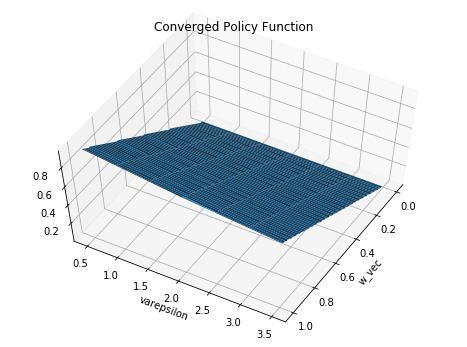

In [17]:
X, Y = np.meshgrid(W, varepsilon)
new_fig = plt.figure(figsize=(8, 6))
new_ax = new_fig.add_subplot(111, projection='3d')
new_ax.plot_surface(X.T, Y.T, new_W)
new_ax.set_xlabel('w_vec')
new_ax.set_ylabel('varepsilon')
new_ax.set_title("Converged Policy Function") 
new_ax.view_init(elev=60,azim=30)
plt.show()